In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = pd.read_parquet('snp_rsi_macd.parquet')
df.head()

,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-19 00:00:00,2024-04-22 00:00:00,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00,Industry,Beta
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993,Diagnostics & Research,1.126
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000,Airlines,1.580
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289,Consumer Electronics,1.264
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999,Drug Manufacturers - General,0.593
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007,Travel Services,1.246


In [3]:
# Ensure 'Date' column is the index
df.set_index('Date', inplace=True)

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

df.head()


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,YUM_RSI_MACD_Diff,ZBH_RSI_MACD,ZBH_RSI_Signal,ZBH_RSI_MACD_Diff,ZBRA_RSI_MACD,ZBRA_RSI_Signal,ZBRA_RSI_MACD_Diff,ZTS_RSI_MACD,ZTS_RSI_Signal,ZTS_RSI_MACD_Diff
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-01,35.818909,34.306366,18.581390,34.194000,NaN,31.938892,19.190001,67.342621,62.590000,40.887074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-02,35.864948,34.400639,18.615952,33.909100,NaN,31.848036,19.023333,66.937775,61.560001,41.361763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-05,36.384441,34.504337,18.879210,34.028362,NaN,32.079304,18.980000,66.634140,61.439999,41.176723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-06,36.174015,34.570320,18.673439,33.730228,NaN,31.864561,18.913334,66.406357,59.439999,40.822712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-07,36.187160,35.088844,18.608089,34.975811,NaN,31.955408,19.073334,65.967751,58.630001,40.870998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Transpose the DataFrame to have dates as index and stocks as columns
df_prices = df.transpose()
df_prices.head()

Date,2014-05-01,2014-05-02,2014-05-05,2014-05-06,2014-05-07,2014-05-08,2014-05-09,2014-05-12,2014-05-13,2014-05-14,...,2024-04-17,2024-04-18,2024-04-19,2024-04-22,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-29,2024-04-30
A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,36.726379,...,134.550003,132.440002,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993
AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,36.616081,...,13.890000,14.020000,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000
AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,18.760675,...,167.772446,166.813736,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289
ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,35.028816,...,164.250000,164.660004,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.369995,160.100006,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007


In [5]:
df_prices.columns

DatetimeIndex(['2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06',
               '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12',
               '2014-05-13', '2014-05-14',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [6]:
# Reset the index to make the stock tickers a separate column
df_prices.reset_index(inplace=True)

# Rename the first column from 'Date' to 'Stock'
df_prices.rename(columns={'index': 'Stock'}, inplace=True)
df_prices.head()

Date,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-17 00:00:00,2024-04-18 00:00:00,2024-04-19 00:00:00,2024-04-22 00:00:00,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,134.550003,132.440002,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,13.890000,14.020000,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,167.772446,166.813736,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,164.250000,164.660004,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.369995,160.100006,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007


In [7]:
df_prices.head()

Date,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-17 00:00:00,2024-04-18 00:00:00,2024-04-19 00:00:00,2024-04-22 00:00:00,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,134.550003,132.440002,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,13.890000,14.020000,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,167.772446,166.813736,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,164.250000,164.660004,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,158.369995,160.100006,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007


In [8]:
# Extract stock tickers, ensuring they are strings and filtering out any invalid entries
stock_tickers = df_prices['Stock'].apply(lambda x: str(x).upper()).tolist()

# Initialize dictionaries to store the industries and beta values
industries = {}
betas = {}

# Fetch industry and beta information for each stock
for ticker in stock_tickers:
    try:
        # Ensure ticker is valid by checking if it is an alphabetical string
        if ticker.isalpha():
            stock_info = yf.Ticker(ticker).info
            industries[ticker] = stock_info.get('industry', 'Unknown')
            betas[ticker] = stock_info.get('beta', float('nan'))
        else:
            industries[ticker] = 'Unknown'
            betas[ticker] = float('nan')
    except Exception as e:
        industries[ticker] = 'Unknown'
        betas[ticker] = float('nan')
        print(f"Could not retrieve data for {ticker}: {e}")

# Convert the industries and betas dictionaries to DataFrames
industries_df = pd.DataFrame.from_dict(industries, orient='index', columns=['Industry'])
betas_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

# Merge the industry and beta information with the original DataFrame
df_prices.set_index('Stock', inplace=True)
df_prices = df_prices.merge(industries_df, left_index=True, right_index=True, how='left')
df_prices = df_prices.merge(betas_df, left_index=True, right_index=True, how='left')

# Print the updated DataFrame with Industry and Beta information
print(df_prices.head())


       2014-05-01 00:00:00  2014-05-02 00:00:00  2014-05-05 00:00:00  \
Stock                                                                  
A                35.818909            35.864948            36.384441   
AAL              34.306366            34.400639            34.504337   
AAPL             18.581390            18.615952            18.879210   
ABBV             34.194000            33.909100            34.028362   
ABNB                   NaN                  NaN                  NaN   

       2014-05-06 00:00:00  2014-05-07 00:00:00  2014-05-08 00:00:00  \
Stock                                                                  
A                36.174015            36.187160            36.364704   
AAL              34.570320            35.088844            36.059853   
AAPL             18.673439            18.608089            18.574923   
ABBV             33.730228            34.975811            34.551777   
ABNB                   NaN                  NaN                

In [9]:
df_prices.reset_index(inplace=True)
df_prices.head()

,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-19 00:00:00,2024-04-22 00:00:00,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00,Industry,Beta
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993,Diagnostics & Research,1.126
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000,Airlines,1.580
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289,Consumer Electronics,1.264
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999,Drug Manufacturers - General,0.593
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007,Travel Services,1.246


In [10]:
df_prices[['Stock', 'Industry', 'Beta']]

,Stock,Industry,Beta
0,A,Diagnostics & Research,1.126
1,AAL,Airlines,1.580
2,AAPL,Consumer Electronics,1.264
3,ABBV,Drug Manufacturers - General,0.593
4,ABNB,Travel Services,1.246
...,...,...,...
4019,ZBRA_RSI_Signal,NaN,NaN
4020,ZBRA_RSI_MACD_Diff,NaN,NaN
4021,ZTS_RSI_MACD,Unknown,NaN
4022,ZTS_RSI_Signal,NaN,NaN


In [11]:
# Save the DataFrame as a Parquet file
df_prices.to_parquet('snp_rsi_macd.parquet', index=False)

array([[<Axes: title={'center': 'Beta'}>]], dtype=object)

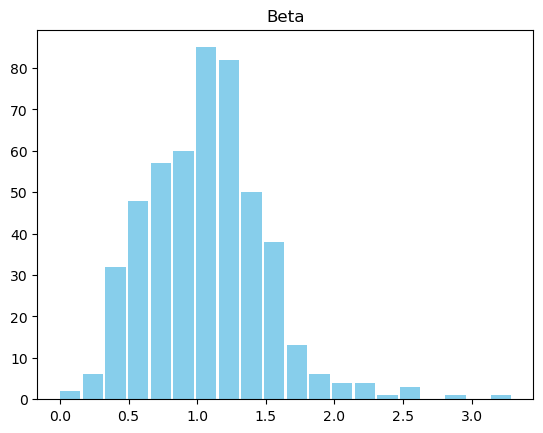

In [12]:
df_prices.hist(column='Beta', bins=20, grid=False, color='skyblue', zorder=2, rwidth=0.9)

In [13]:
# pip install pandas_ta

In [38]:
df_prices = pd.read_parquet('snp_rsi_macd.parquet')

In [39]:
df_prices.head()

,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-19 00:00:00,2024-04-22 00:00:00,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00,Industry,Beta
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,132.729996,133.910004,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993,Diagnostics & Research,1.126
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,14.110000,14.530000,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000,Airlines,1.580
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,164.776505,165.615356,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289,Consumer Electronics,1.264
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,166.410004,167.889999,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999,Drug Manufacturers - General,0.593
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,155.009995,156.610001,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007,Travel Services,1.246


In [40]:
import pandas_ta as ta

In [41]:

# Transpose the DataFrame to have dates as rows and stocks as columns
df_transposed = df_prices.set_index('Stock').transpose()

# Function to calculate MACD
def calculate_macd(close):
    macd = ta.macd(close)
    return macd['MACD_12_26_9']

# Function to calculate RSI
def calculate_rsi(close, length=14):
    rsi = ta.rsi(close, length=length)
    return rsi

# DataFrames to store MACD and RSI values
macd_df = pd.DataFrame(index=df_transposed.index)
rsi_df = pd.DataFrame(index=df_transposed.index)

# Calculate MACD and RSI for each stock
for stock in df_transposed.columns:
    macd_df[stock] = calculate_macd(df_transposed[stock])
    rsi_df[stock] = calculate_rsi(df_transposed[stock])

# Transpose back to original structure and add to df_prices
macd_df_transposed = macd_df.transpose()
rsi_df_transposed = rsi_df.transpose()

df_prices['MACD'] = macd_df_transposed.mean(axis=1)
df_prices['RSI'] = rsi_df_transposed.mean(axis=1)

# Display the updated DataFrame
df_prices.head()


DataError: No numeric types to aggregate

In [ ]:
df_prices.head()

,Stock,2014-05-01 00:00:00,2014-05-02 00:00:00,2014-05-05 00:00:00,2014-05-06 00:00:00,2014-05-07 00:00:00,2014-05-08 00:00:00,2014-05-09 00:00:00,2014-05-12 00:00:00,2014-05-13 00:00:00,...,2024-04-23 00:00:00,2024-04-24 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,2024-04-29 00:00:00,2024-04-30 00:00:00,Industry,Beta,MACD,RSI
0,A,35.818909,35.864948,36.384441,36.174015,36.187160,36.364704,36.423893,37.094631,37.370804,...,139.199997,137.490005,136.369995,137.740005,139.589996,137.039993,Diagnostics & Research,1.126,NaN,NaN
1,AAL,34.306366,34.400639,34.504337,34.570320,35.088844,36.059853,36.069294,37.134579,37.059177,...,14.230000,13.920000,14.130000,13.880000,13.980000,13.510000,Airlines,1.580,NaN,NaN
2,AAPL,18.581390,18.615952,18.879210,18.673439,18.608089,18.574923,18.497526,18.727819,18.757200,...,166.673920,168.791061,169.659882,169.070679,173.264984,170.099289,Consumer Electronics,1.264,NaN,NaN
3,ABBV,34.194000,33.909100,34.028362,33.730228,34.975811,34.551777,34.624657,34.697540,34.584908,...,169.539993,167.800003,167.289993,159.619995,161.520004,162.639999,Drug Manufacturers - General,0.593,NaN,NaN
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160.949997,162.839996,163.009995,164.229996,162.250000,158.570007,Travel Services,1.246,NaN,NaN
